[![icons8-linkedin.gif](attachment:c9494563-7284-4c71-9fe4-40d31b4558ff.gif 'Author : Suryakant Kumar')](https://www.linkedin.com/in/suryakantkumar/)[![icons8-github.gif](attachment:ecd1af6f-8660-4379-b68f-bad3ed6d67c8.gif 'Author : Suryakant Kumar')](https://github.com/SuryakantKumar)
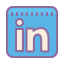
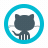

# <span style="color:skyblue">**Introduction To Docker**</span>

### <span style="color:orange">Why Docker ?</span>

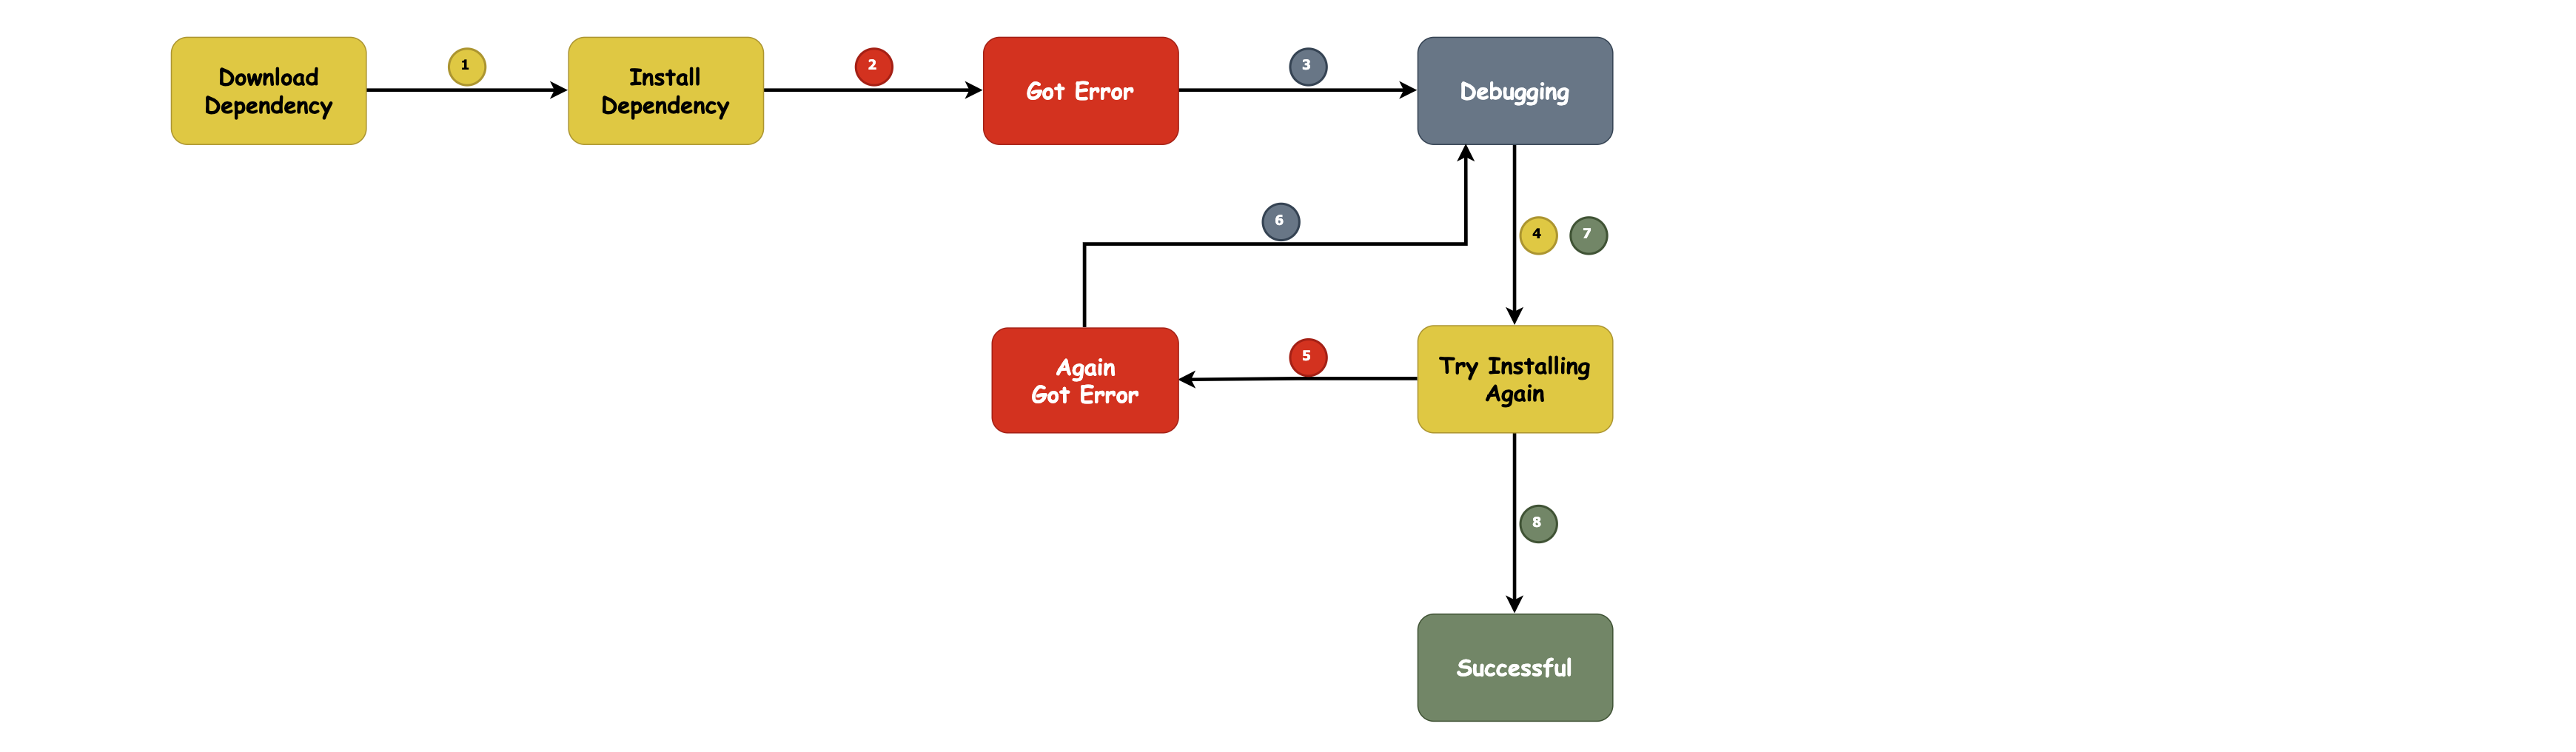

* When installing a new tool, traditional installations (direct installation on local) can lead to issues with missing dependencies or mysterious errors.

* Debugging and reinstalling become time-consuming and frustrating.

* `Docker` addresses these problems by encapsulating applications and their dependencies into `containers`.

* An application running in a Docker container on one machine (operating system) will behave the same way, when running on another machine.

* Docker containers provide `isolation`, allowing applications to run independently of the underlying `operating system`. This isolation ensures that changes made to one container do not affect others, making applications more `portable` across different environments.

* Docker containers are lightweight and share the `host system's kernel`, making them efficient in terms of resource utilization.

* Multiple containers with different dependencies can run on the same machine without significant overhead, optimizing resource usage.

* Docker simplifies the deployment process of the application across different environments, whether it's a development, testing, or production environment.

* Docker also facilitates horizontal scaling by allowing the `replication` of containers across multiple `hosts` or in cloud environments, making it easier to handle increased `workloads` and improve application performance.

* Teams can work with the same environment, reducing compatibility issues and enabling faster development cycles.

### <span style="color:orange">How Docker Works?</span>

Let's say, We have our application and we want to `install` & `run` the application. There are some instructions that we have to perform in order to install and use the application:

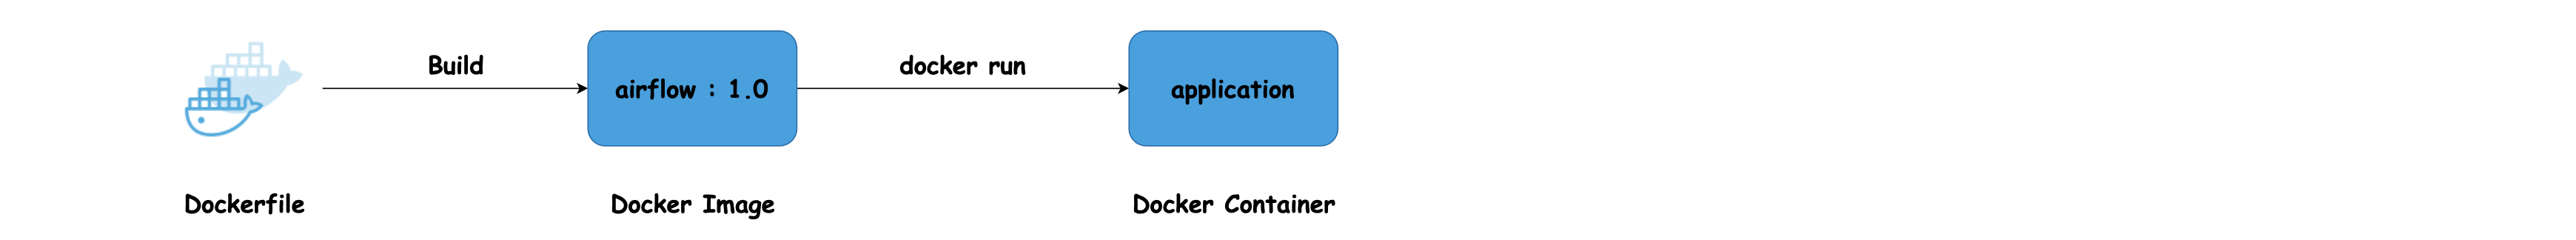

1. **Prepare Our Application Instructions**: To run our application, We need to perform certain setup tasks like Installing `Python`, Setting up dependencies like `wget`, Creating `user` accounts, and `configuring` our application environment. These tasks are essential for our application to function properly.

2. **Create a Dockerfile**: We gather all these setup instructions and place them into a file called a `Dockerfile`. A Dockerfile is like a blueprint for our application's environment. It contains all the steps needed to set up and run our application inside a `Docker container`.

3. **Build a Docker Image**: Once we have our Dockerfile ready, We use it to build a `Docker image`. This image contains everything our application needs to run, just like a compiled version of our application.

4. **Run Our Application with Docker**: To start our application using Docker, We execute a simple command: `docker run`. We specify the `name` of the Docker image we built (e.g., `airflow:1.0`). When we run this command, Docker creates a `Docker container` based on our `image`. Inside this container, our application runs in its isolated environment.

### <span style="color:orange">Nature of Docker Container</span>

Inside a Docker container, our application operates within its own isolated environment. This means that all the dependencies, such as Python 3.8 or any other software required for our application, are contained within the Docker container.

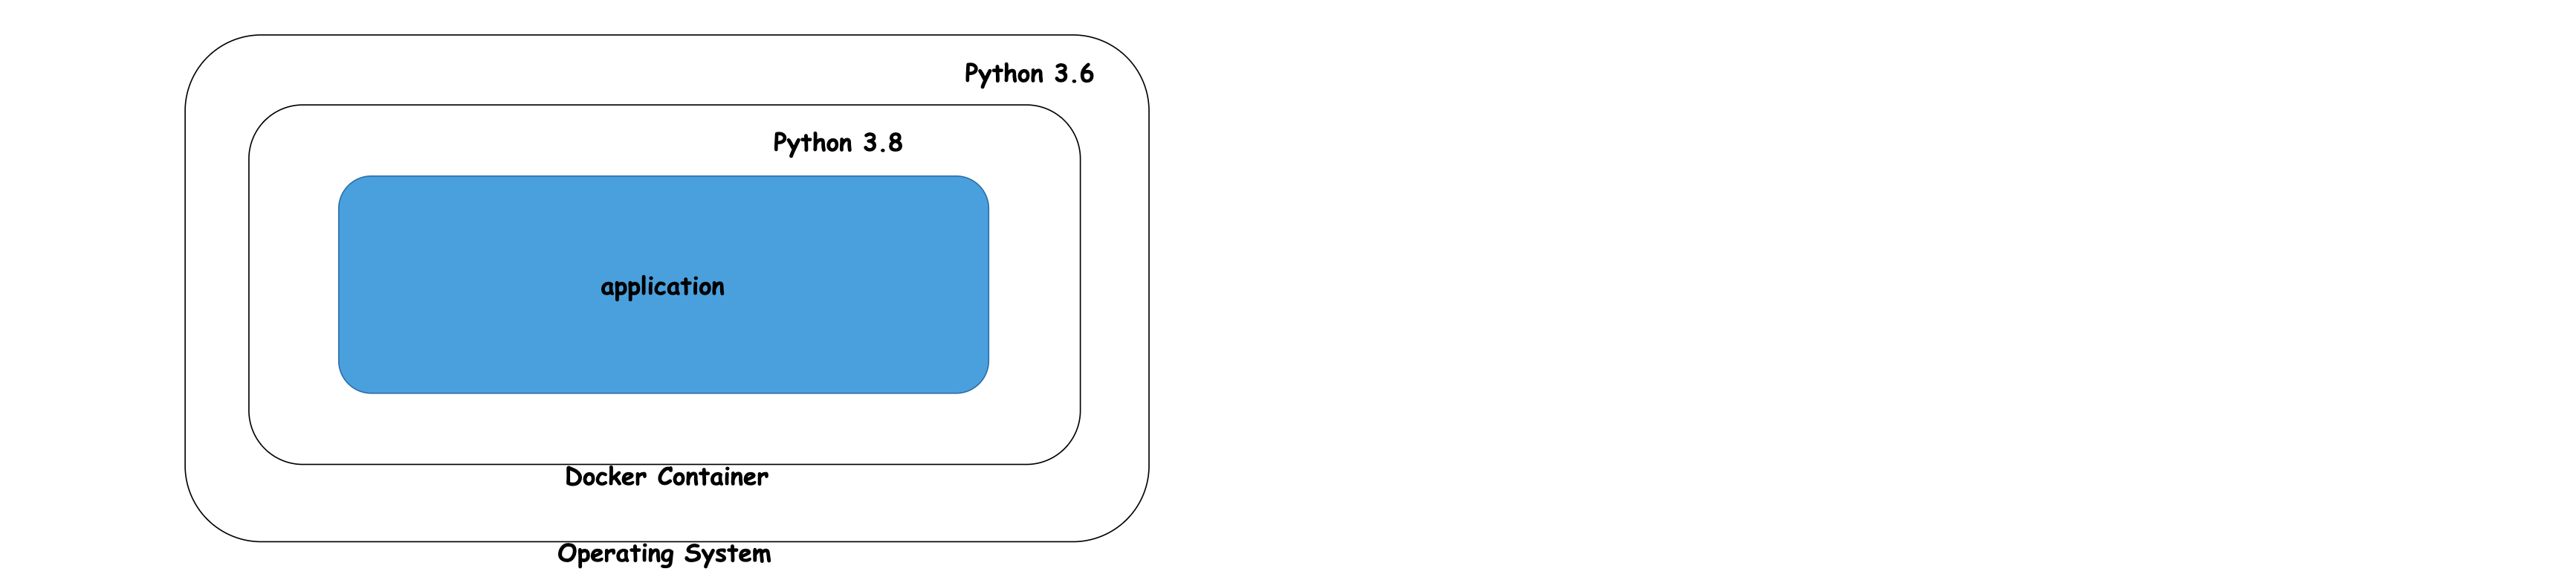

Here's why it's beneficial:

1. **Isolation**: The dependencies installed inside the Docker container are isolated from those on our host operating system. For instance, if our host system has Python 3.6 installed, it won't interfere with Python 3.8 installed inside the Docker container. This isolation prevents compatibility issues and ensures that our application runs consistently regardless of the host environment.

2. **Lightweight**: Docker containers are like lightweight virtual machines. They provide a consistent runtime environment for our application without the overhead of a full-fledged virtual machine. This makes them faster to start up, easier to manage, and more resource-efficient.

3. **Time-saving**: Docker simplifies the process of managing dependencies and setting up the application environment. Once we have our Docker container configured, we can deploy it across different environments with confidence, knowing that our application will run consistently every time.


### <span style="color:orange">Docker Compose</span>

`Docker Compose` is an essential tool for managing `multi-container` Docker applications, like Apache `Airflow`, where we have multiple components that need to work together.

Here's how Docker Compose simplifies the orchestration of Docker containers:

1. **Component Separation**: In the case of Apache Airflow, We typically have three core components: the `web server`, the `scheduler`, and the `meta database`. Instead of running all these components in a single container, which could lead to issues if one component fails, Docker Compose allows us to separate them into individual containers.

2. **Dockerfile for Images**: We start by defining a `Dockerfile` for `each component`, which describes how to build the `Docker image` corresponding to that component. This ensures that each component has its own isolated environment and dependencies.

3. **Docker Compose File**: Then, We create a `Docker Compose` file, usually named `docker-compose.yaml`, where we specify the services we want to run for our application. In this file, we define the configuration for each service, including which Docker image to use, environment variables, volumes, ports, and other settings.

4. **Simplified Management**: With Docker Compose, We don't need to manually execute `docker run` commands for each service. Instead, we define all the services and their configurations in the Docker Compose file, and then we can start, stop, and manage the entire application with a single command: `docker-compose up`.

5. **Networking**: Docker Compose automatically creates a network for our application, allowing all the containers defined in the Compose file to communicate with each other seamlessly. This ensures that the web server can interact with the scheduler and the database as needed.

### <span style="color:orange">Description :</span> docker-compose.yaml

Let's understand the key components of `docker-compose.yaml`:

* At the top, We specify the version of `Docker Compose syntax` used in the file, which is `2.1` in this case.

* Then, Under the section `services`, We define the `Docker containers` that will run for our application:

    * **Postgres Service**

        ```yaml
        build: './docker/postgres'
        ```

        It means that, postgres service is based on the `Docker image` built from the `Dockerfile` available in `docker/postgres` folder.

        ```yaml
        restart: always
        ```

        It's configured to restart automatically if it fails.

        ```yaml
        container_name: postgres
        ```

        The container is named `postgres`.

        ```yaml
        ports:
          - "32769:5432"
        ```

        Ports are bound to allow communication. Here, We bind the port `5432` from the Docker container with the `32769` port on our machine.

        ```yaml
        environment:
          - POSTGRES_USER=airflow
          - POSTGRES_PASSWORD=airflow
          - POSTGRES_DB=airflow_db
          - PGDATA=/var/lib/postgresql/data/pgdata
        ```
        
        Here, Environment variables are defined for the docker container. So These environment variables will be accessible inside the Docker container which is corresponding to the postgres.

        ```yaml
        healthcheck:
          test: [ "CMD", "pg_isready", "-q", "-d", "airflow_db", "-U", "airflow" ]
          timeout: 45s
          interval: 10s
          retries: 10
        ```

        A health check ensures that the docker container corresponding to `postgres` is running as expected.

    * **Airflow Service**

        ```yaml
        build: ./docker/airflow
        ```

        It means that, airflow service is based on the `Docker image` built from the `Dockerfile` available in `docker/airflow` folder.

        ```yaml
        restart: always
        ```

        It's configured to restart automatically if it fails.

        ```yaml
        container_name: airflow
        ```

        The container is named `airflow`.

        ```yaml
        volumes:
          - ./mnt/airflow/airflow.cfg:/opt/airflow/airflow.cfg
          - ./mnt/airflow/dags:/opt/airflow/dags
        ```

        Volumes are mounted to synchronize files between our machine and the Docker container. The folder `dags` in `mnt/airflow` is binded with the same folder `tags` inside the `Docker container` of airflow. So whatever we are going to put in the folder `tags` from our machine are going to be automatically synchronized with the folder inside the `Docker container` of airflow. Same for the file `airflow.cfg`. This means any modification that we put in the configuration file on our machine here, will be automatically applied in the same file inside the Docker container.

        ```yaml
        ports:
          - 8080:8080
        ```

        In addition, the ports `8080` of the `Docker container` is binded with the port `8080` from our machine. So If we can't access airflow on that port, `8080` on our machine, we might need to change that port. So `8081` or `8082` instead of having `8080`.

        ```yaml
        healthcheck:
          test: [ "CMD", "nc", "-z", "airflow", "8080" ]
          timeout: 45s
          interval: 10s
          retries: 10
        ```

        A health check ensures that the docker container corresponding to `airflow` is running as expected.

### <span style="color:orange">Stop Running Container</span>

* List the running docker contains using the command `docker ps`

* Then, Copy the `container id` of the running container and execute the command `docker stop <container_id>`